In [315]:
#필요한 패키지를 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (12, 12)

import warnings
warnings.filterwarnings('ignore')

In [85]:
raw_data = pd.read_csv('data/최종데이터/최종_열삭제전.csv', encoding='utf-8', index_col=0)

final_data = raw_data.drop(['SO2', 'CO', 'O3', 'NO2', 'PM25', '적설'], axis=1)

delete_index = final_data.loc[final_data['업종명']=='심부름'].index
final_data = final_data.drop(delete_index, axis=0)

final_data.reset_index(drop=True, inplace=True)

final_data

,광역시도명,날짜,요일,시간대별 시간,업종명,계절,공휴일,기념일,기온,풍속,습도,PM10,운량,날씨,눈비,강수량,확진자수,주문건수
0,경기도,2019-07-17,수,0,도시락,여름,0,0,22.86,0.54,91.2,79.512,6.4,3,0,0.0,0.0,1
1,경기도,2019-07-17,수,11,도시락,여름,0,0,26.80,1.34,71.6,58.013,9.2,4,0,0.0,0.0,13
2,경기도,2019-07-17,수,12,도시락,여름,0,0,27.26,1.46,71.4,57.240,9.8,4,0,0.0,0.0,14
3,경기도,2019-07-17,수,13,도시락,여름,0,0,27.52,1.48,69.8,60.360,9.8,4,0,0.0,0.0,13
4,경기도,2019-07-17,수,14,도시락,여름,0,0,27.44,1.38,72.6,64.595,10.0,4,1,2.2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221205,서울,2020-09-30,수,19,회,가을,1,0,19.00,2.70,90.0,31.320,10.0,4,1,29.5,30.0,7
221206,서울,2020-09-30,수,20,회,가을,1,0,18.40,1.90,91.0,27.520,5.0,2,1,4.5,30.0,11
221207,서울,2020-09-30,수,21,회,가을,1,0,18.20,0.70,91.0,22.720,7.0,3,0,0.0,30.0,3
221208,서울,2020-09-30,수,22,회,가을,1,0,17.60,1.50,92.0,19.600,6.0,3,0,0.0,30.0,7


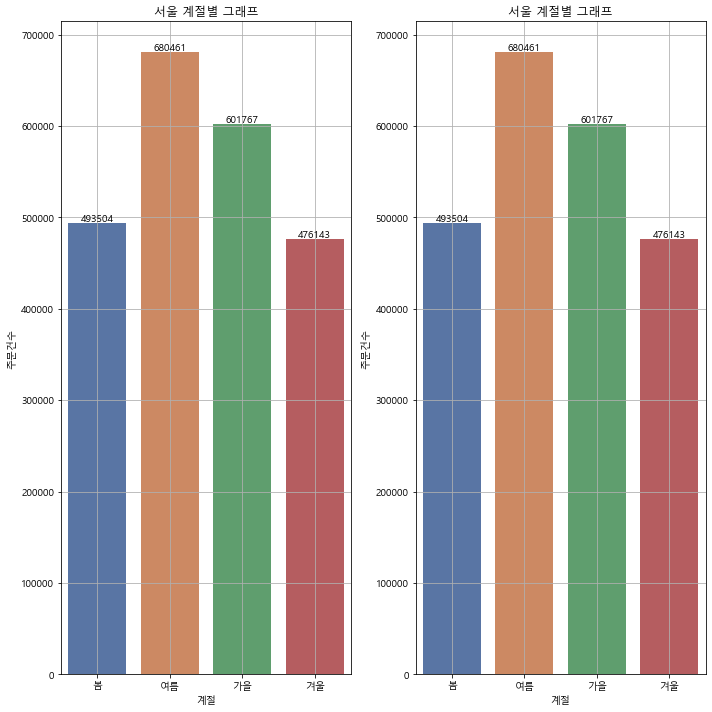

In [86]:

area = ['서울', '경기도']

data_sl = final_data.loc[final_data['광역시도명']=='서울']
data_gg = final_data.loc[final_data['광역시도명']=='경기도']


tt = data_sl.groupby('계절').agg({'주문건수':sum}).reindex(['봄', '여름', '가을', '겨울'])
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

for ax in axes.ravel():
    sns.barplot(x=tt.index, y=tt['주문건수'], data=tt, palette='deep', ax=ax)
    x = np.arange(len(tt.index))
    y = tt['주문건수']
    
    for i, v in enumerate(x):
        ax.text(v, y[i], y[i],
               fontsize=10, color='black', 
               horizontalalignment='center',
               verticalalignment='bottom')
        ax.set_title('서울 계절별 그래프')
    ax.grid()
    plt.tight_layout()

In [89]:


def bar_plotting(df=None, X=None, aggfunc=sum):
    
    area = ['서울', '경기도']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 14))

    for i, ax in enumerate(axes.ravel()):
        tmd_df = df.loc[df['광역시도명']==area[i]]
        
        if X == '계절':
            data = tmd_df.groupby(X).agg({'주문건수':aggfunc}).reindex(['봄', '여름', '가을', '겨울'])
        else:
            data = tmd_df.groupby(X).agg({'주문건수':aggfunc})
            
        sns.barplot(x=data.index, y=data['주문건수'], data=data, palette='deep', ax=ax)
        
        x = np.arange(len(data.index))
        y = data['주문건수']

        for j, v in enumerate(x):
            ax.text(v, y[j], y[j],
                   fontsize=10, color='black', 
                   horizontalalignment='center',
                   verticalalignment='bottom')
            
            ax.set_title(area[i]+ ' '+ X +' barplot')
            ax.set_xticklabels(data.index, rotation=45)
            
        ax.grid()
        plt.tight_layout()

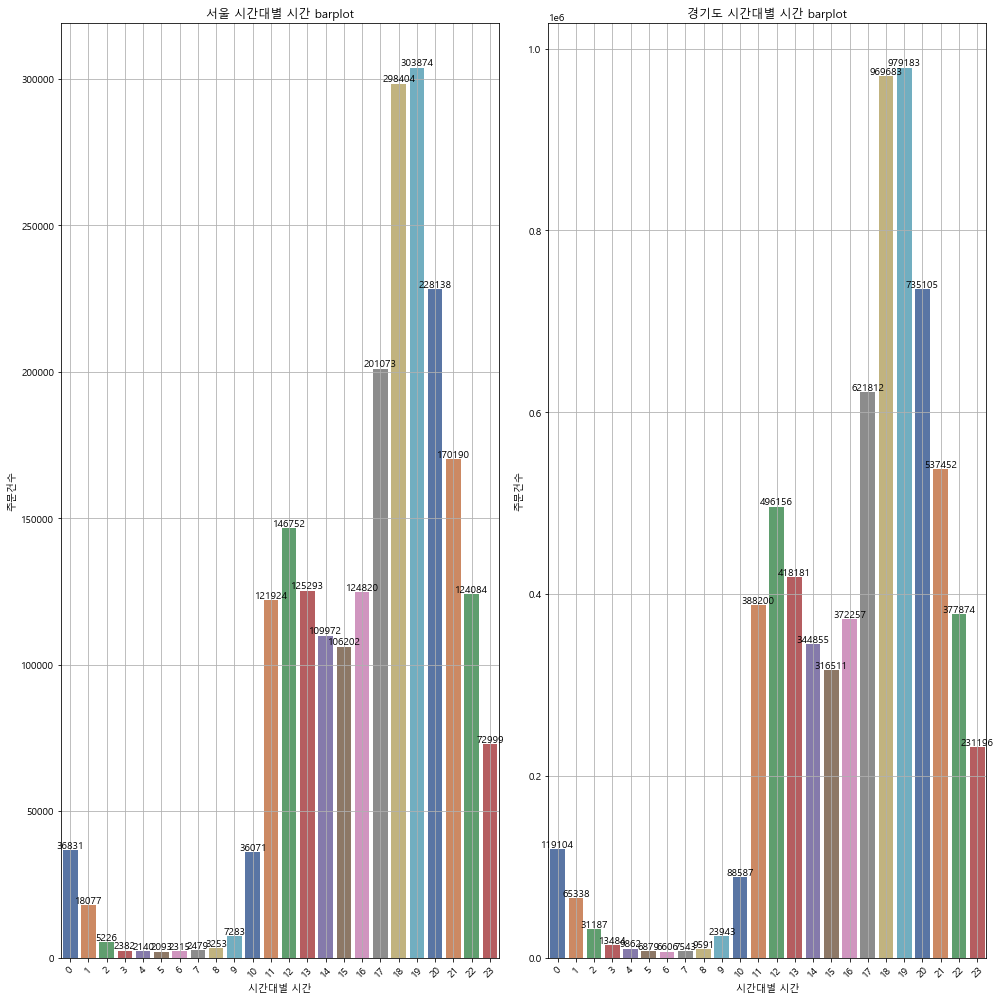

In [220]:
bar_plotting(df=final_data, X='시간대별 시간', aggfunc=sum)

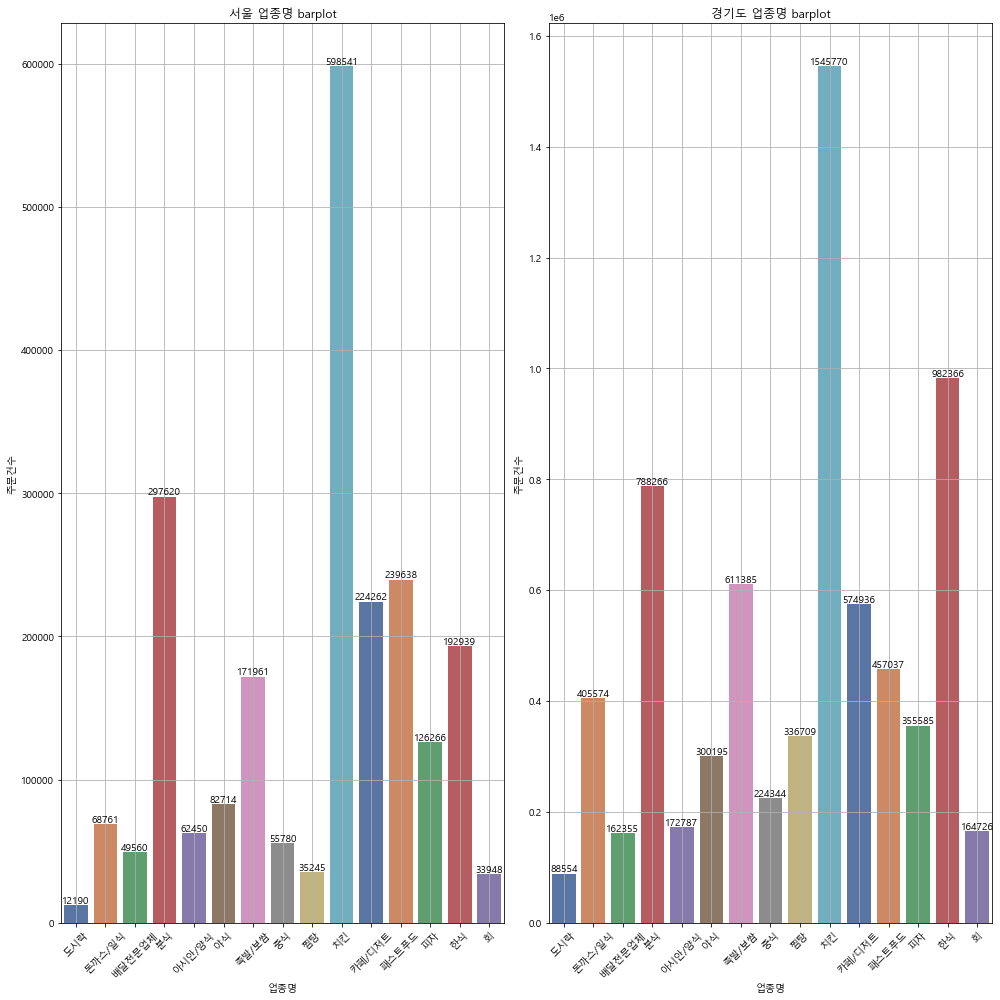

In [235]:
bar_plotting(df=final_data, X='업종명', aggfunc=sum)

C:\Users\qkrtj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='기온', ylabel='Density'>

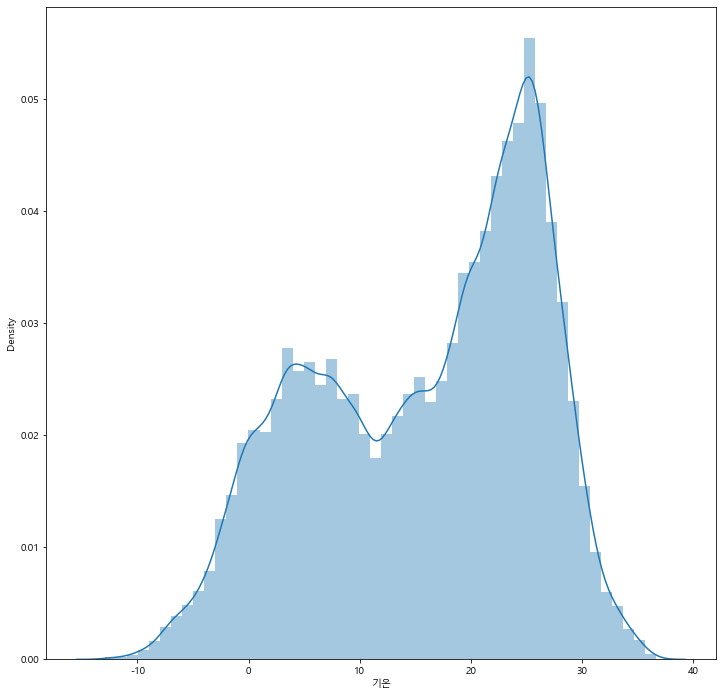

In [93]:
sns.distplot(final_data['기온'])

C:\Users\qkrtj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='주문건수', ylabel='Density'>

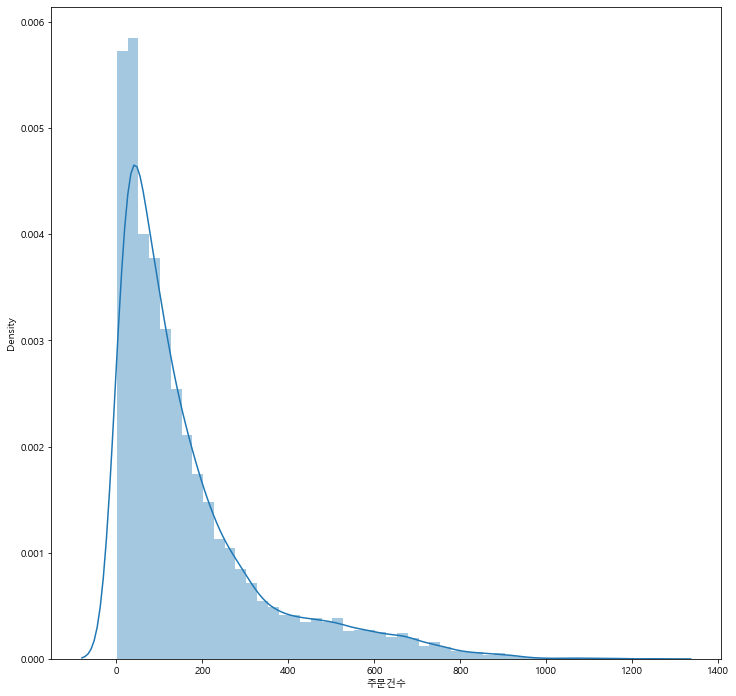

In [236]:
sns.distplot(final_data.loc[(final_data['시간대별 시간']>=10)&(final_data['업종명']=='치킨')]['주문건수'])

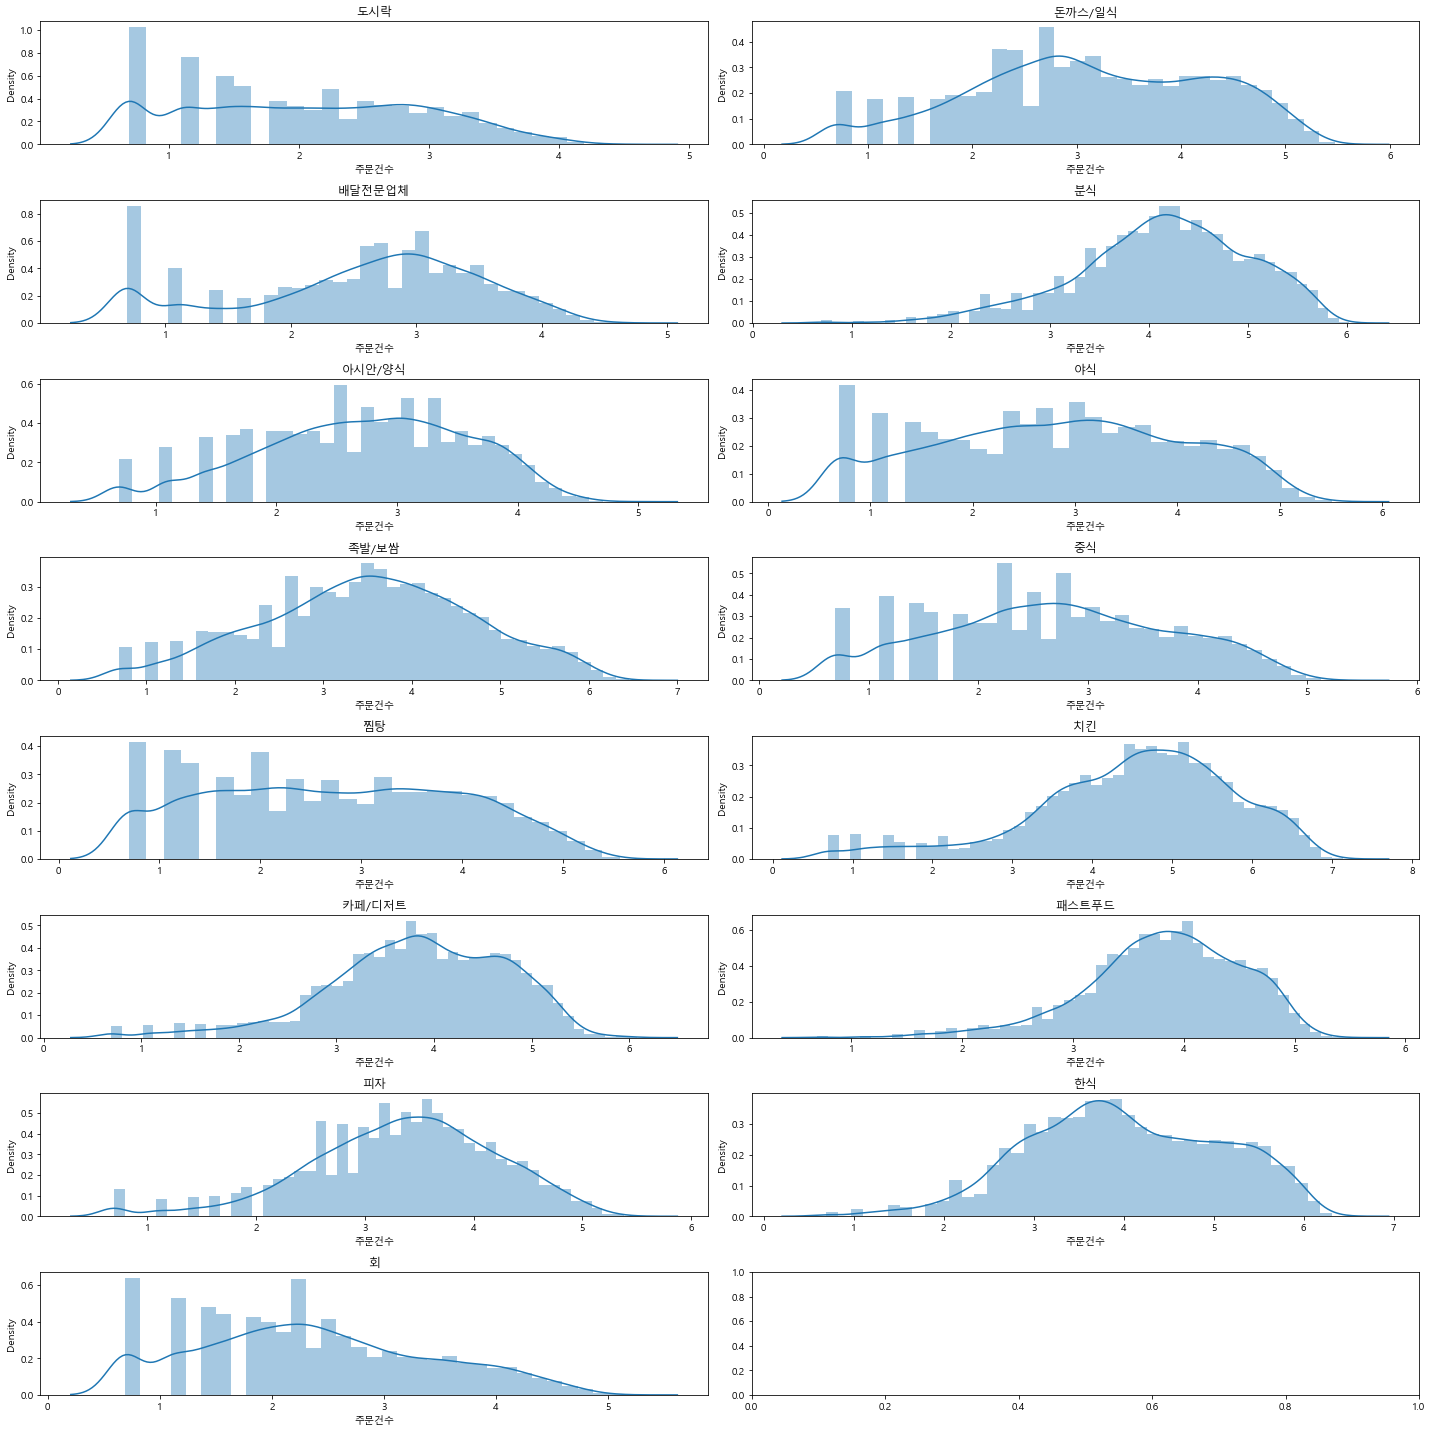

In [319]:
columns = np.unique(final_data['업종명'])

fig, axes = plt.subplots(8, 2, figsize=(20, 20))

ax = axes.ravel()

for i, column in enumerate(columns):
    ax[i].set_title(columns[i])
    sns.distplot(np.log1p(final_data.loc[(final_data['시간대별 시간']>=10)&(final_data['업종명']==columns[i])]['주문건수']), ax=ax[i])
    plt.tight_layout()
        
    

C:\Users\qkrtj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='주문건수', ylabel='Density'>

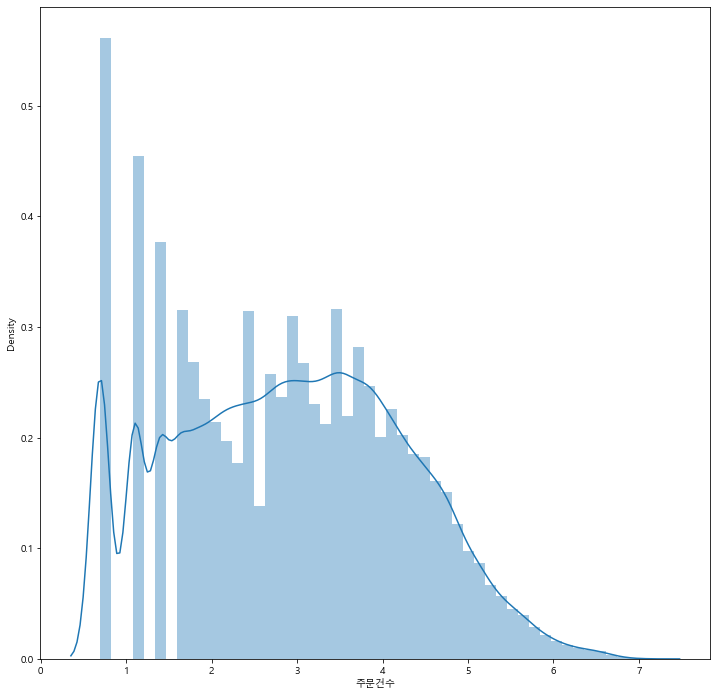

In [98]:
sns.distplot(np.log1p(final_data['주문건수']))

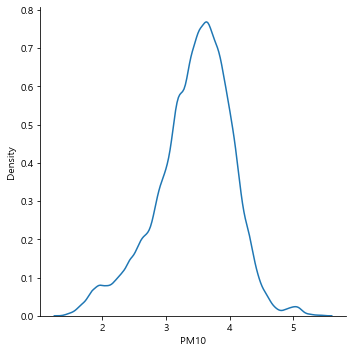

In [287]:
sns.displot(np.log1p(final_data['PM10']), kind='kde')

In [102]:
from scipy.stats import skew

# Object가 아닌 숫자형 feature의 컬럼 index 추출

features_index = final_data.dtypes[(final_data.dtypes != 'object') ].index
features_index



Index(['시간대별 시간', '공휴일', '기념일', '기온', '풍속', '습도', 'PM10', '운량', '날씨', '눈비',
       '강수량', '확진자수', '주문건수'],
      dtype='object')

In [104]:
skew_features = final_data[features_index].apply(lambda x: skew(x))

In [106]:
skew_features_top = skew_features[abs(skew_features)>1]
print(skew_features_top.sort_values(ascending=False))

강수량     9.954121
기념일     4.656331
주문건수    4.567796
확진자수    3.638094
공휴일     3.542805
눈비      2.200352
PM10    1.898544
풍속      1.069915
dtype: float64


<AxesSubplot:xlabel='시간대별 시간', ylabel='주문건수'>

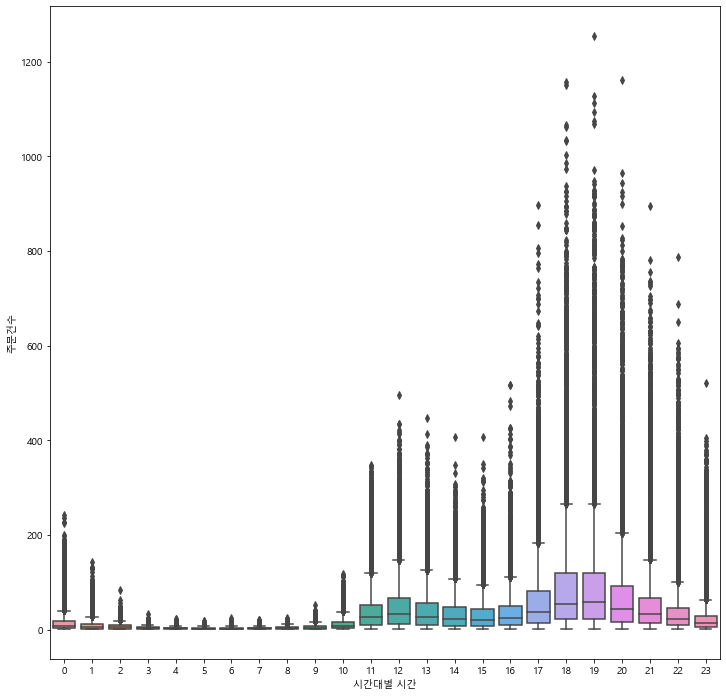

In [122]:
sns.boxplot(x='시간대별 시간', y='주문건수', data=final_data)

<AxesSubplot:xlabel='계절', ylabel='주문건수'>

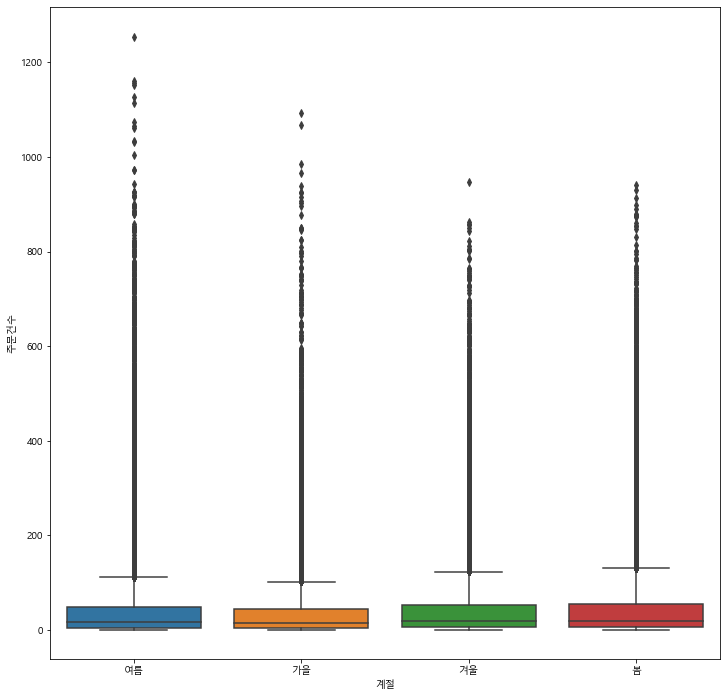

In [123]:
sns.boxplot(x='계절', y='주문건수', data=final_data)

<AxesSubplot:xlabel='계절', ylabel='주문건수'>

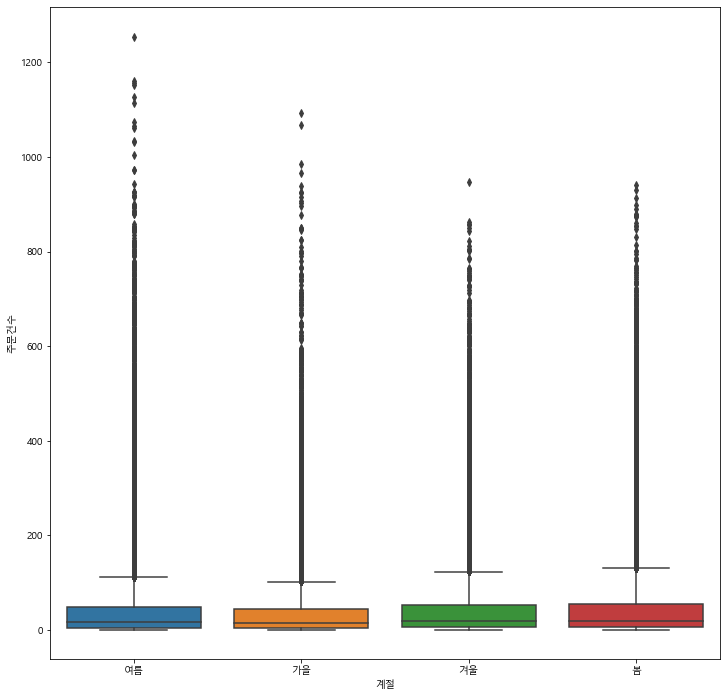

In [205]:
sns.boxplot(x='계절', y='주문건수', data=final_data)

<AxesSubplot:xlabel='기념일', ylabel='주문건수'>

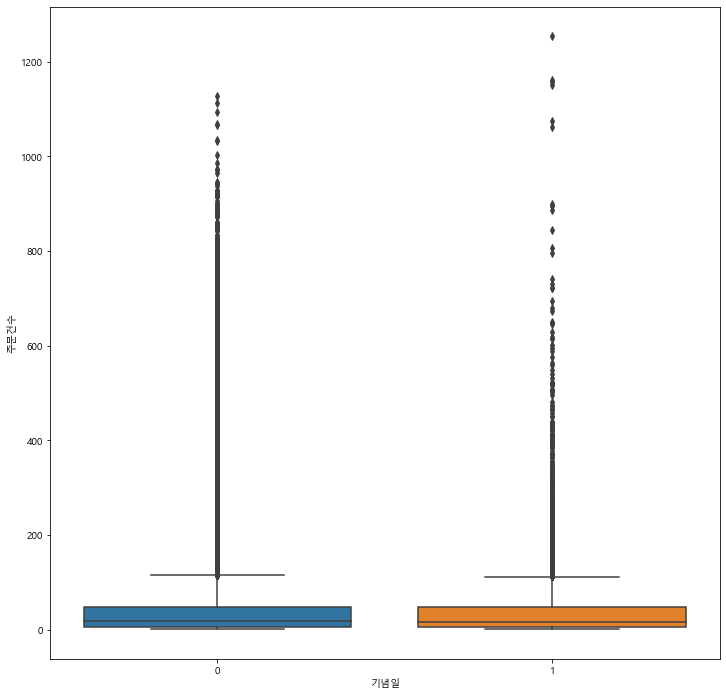

In [209]:
sns.boxplot(x='기념일', y='주문건수', data=final_data)

In [152]:
pd.get_dummies(final_data[['요일', '시간대별 시간', '계절', '공휴일', '기념일', '날씨', '눈비']])

dummy_dict = {'요일': 'day', '시간대별 시간': 'time', '계절': 'season', '공휴일' : 'holiday', '기념일' : 'holiday2', '날씨' : 'climate', '눈비': 'rain_snow'}

def get_all_dummies(data=None, dummy_dict=None):
    df = pd.DataFrame()
    
    for dummy in list(dummy_dict.keys()):
        
        tmp_df = pd.get_dummies(data[dummy], prefix=dummy_dict[dummy])
        
        df = pd.concat([df, tmp_df], axis=1)
        
    return df
        
    
    
    

In [154]:
dummies = get_all_dummies(final_data, dummy_dict)

In [156]:
temp = pd.concat([final_data, dummies], axis=1)

temp.drop(list(dummy_dict.keys()), axis=1, inplace=True)

In [271]:
chicken = temp.loc[temp['업종명']=='배달전문업체']

chicken_sl = chicken.loc[chicken['광역시도명']=='서울']
chicken_gg = chicken.loc[chicken['광역시도명']=='경기도']

In [272]:
chicken_sl_fin = chicken_sl.drop(['광역시도명', '업종명', '날짜'], axis=1)
chicken_gg_fin = chicken_gg.drop(['광역시도명', '업종명', '날짜'], axis=1)

In [273]:
chicken_gg_fin

,기온,풍속,습도,PM10,운량,강수량,확진자수,주문건수,day_금,day_목,...,holiday_1,holiday_2,holiday2_0,holiday2_1,climate_1,climate_2,climate_3,climate_4,rain_snow_0,rain_snow_1
14400,22.86,0.54,91.2,79.512,6.4,0.0,0.0,11,0,0,...,0,0,1,0,0,0,1,0,1,0
14401,22.48,0.52,92.2,57.704,7.2,0.0,0.0,2,0,0,...,0,0,1,0,0,0,1,0,1,0
14402,26.36,1.24,75.6,59.775,8.0,0.0,0.0,3,0,0,...,0,0,1,0,0,0,1,0,1,0
14403,26.80,1.34,71.6,58.013,9.2,0.0,0.0,6,0,0,...,0,0,1,0,0,0,0,1,1,0
14404,27.26,1.46,71.4,57.240,9.8,0.0,0.0,14,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23719,19.06,1.38,80.8,34.465,7.4,0.0,19.0,33,0,0,...,1,0,1,0,0,0,1,0,1,0
23720,17.96,0.68,85.2,32.687,6.4,0.0,19.0,25,0,0,...,1,0,1,0,0,0,1,0,1,0
23721,17.36,0.96,87.4,31.051,5.2,0.0,19.0,17,0,0,...,1,0,1,0,0,0,0,1,1,0
23722,16.78,0.92,89.8,30.242,5.0,0.0,19.0,13,0,0,...,1,0,1,0,0,1,0,0,1,0


In [274]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y_target = chicken_gg_fin['주문건수']
X_features = chicken_gg_fin.drop('주문건수', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, np.log1p(y_target), test_size=0.2, random_state=156)

In [275]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6086623336132488

In [276]:
lr.coef_

array([-1.36554743e-03, -2.63940197e-03,  1.99864508e-03,  9.79561470e-04,
        1.07268125e-02,  2.77044125e-03,  3.80566805e-03, -1.96587865e+09,
       -1.96587865e+09, -1.96587865e+09, -1.96587865e+09, -1.96587865e+09,
       -1.96587865e+09, -1.96587865e+09,  9.36266317e+07,  9.36266315e+07,
        9.36266312e+07,  9.36266311e+07,  9.36266310e+07,  9.36266307e+07,
        9.36266307e+07,  9.36266308e+07,  9.36266309e+07,  9.36266312e+07,
        9.36266318e+07,  9.36266326e+07,  9.36266326e+07,  9.36266324e+07,
        9.36266322e+07,  9.36266320e+07,  9.36266320e+07,  9.36266324e+07,
        9.36266329e+07,  9.36266330e+07,  9.36266328e+07,  9.36266325e+07,
        9.36266322e+07,  9.36266320e+07, -1.58016081e+10, -1.58016081e+10,
       -1.58016081e+10, -1.58016081e+10, -2.00564794e+09, -2.00564794e+09,
       -2.00564794e+09, -3.59338434e+08, -3.59338434e+08, -1.82048142e+09,
       -1.82048142e+09, -1.82048142e+09, -1.82048142e+09, -3.11512743e+09,
       -3.11512743e+09])

In [277]:
for column, coef in zip(X_features.columns, lr.coef_):
    print(column, np.round(coef, 3))

기온 -0.001
풍속 -0.003
습도 0.002
PM10 0.001
운량 0.011
강수량 0.003
확진자수 0.004
day_금 -1965878647.273
day_목 -1965878647.284
day_수 -1965878647.268
day_월 -1965878647.245
day_일 -1965878646.987
day_토 -1965878647.089
day_화 -1965878647.263
time_0 93626631.693
time_1 93626631.458
time_2 93626631.22
time_3 93626631.109
time_4 93626630.971
time_5 93626630.699
time_6 93626630.73
time_7 93626630.814
time_8 93626630.874
time_9 93626631.18
time_10 93626631.788
time_11 93626632.606
time_12 93626632.637
time_13 93626632.446
time_14 93626632.157
time_15 93626631.959
time_16 93626632.016
time_17 93626632.409
time_18 93626632.871
time_19 93626632.993
time_20 93626632.753
time_21 93626632.465
time_22 93626632.23
time_23 93626631.972
season_가을 -15801608101.921
season_겨울 -15801608101.788
season_봄 -15801608101.231
season_여름 -15801608101.54
holiday_0 -2005647938.146
holiday_1 -2005647938.091
holiday_2 -2005647938.08
holiday2_0 -359338433.609
holiday2_1 -359338433.703
climate_1 -1820481415.691
climate_2 -1820481415.741

In [288]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [289]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.6086620969872837

In [290]:
for column, coef in zip(X_features.columns, lr.coef_):
    print(column, np.round(coef, 3))

기온 -0.066
풍속 -0.025
습도 0.167
PM10 0.224
운량 0.107
강수량 0.07
확진자수 0.472
day_금 -2736037812.29
day_목 -2736037812.302
day_수 -2736037812.285
day_월 -2736037812.262
day_일 -2736037812.004
day_토 -2736037812.107
day_화 -2736037812.281
time_0 1584710291.088
time_1 1584710290.853
time_2 1584710290.615
time_3 1584710290.504
time_4 1584710290.366
time_5 1584710290.094
time_6 1584710290.125
time_7 1584710290.209
time_8 1584710290.268
time_9 1584710290.575
time_10 1584710291.183
time_11 1584710292.001
time_12 1584710292.031
time_13 1584710291.841
time_14 1584710291.552
time_15 1584710291.354
time_16 1584710291.411
time_17 1584710291.804
time_18 1584710292.266
time_19 1584710292.388
time_20 1584710292.148
time_21 1584710291.86
time_22 1584710291.625
time_23 1584710291.367
season_가을 20545998545.616
season_겨울 20545998545.749
season_봄 20545998546.306
season_여름 20545998545.997
holiday_0 -7256375558.398
holiday_1 -7256375558.344
holiday_2 -7256375558.332
holiday2_0 1703559978.264
holiday2_1 1703559978.17
clima

In [281]:
ridge = Ridge()

ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.6087033332684103

In [282]:
for column, coef in zip(X_features.columns, ridge.coef_):
    print(column, np.round(coef, 3))

기온 -0.001
풍속 -0.002
습도 0.002
PM10 0.001
운량 0.011
강수량 0.003
확진자수 0.004
day_금 -0.072
day_목 -0.083
day_수 -0.066
day_월 -0.044
day_일 0.215
day_토 0.112
day_화 -0.062
time_0 -0.14
time_1 -0.374
time_2 -0.611
time_3 -0.721
time_4 -0.859
time_5 -1.128
time_6 -1.097
time_7 -1.013
time_8 -0.955
time_9 -0.652
time_10 -0.049
time_11 0.766
time_12 0.795
time_13 0.605
time_14 0.316
time_15 0.118
time_16 0.176
time_17 0.568
time_18 1.03
time_19 1.152
time_20 0.914
time_21 0.628
time_22 0.393
time_23 0.137
season_가을 -0.3
season_겨울 -0.165
season_봄 0.387
season_여름 0.078
holiday_0 -0.04
holiday_1 0.015
holiday_2 0.025
holiday2_0 0.047
holiday2_1 -0.047
climate_1 0.057
climate_2 0.007
climate_3 -0.041
climate_4 -0.023
rain_snow_0 0.012
rain_snow_1 -0.012


In [285]:
from sklearn.ensemble import RandomForestRegressor


rf_lr = RandomForestRegressor(max_depth=10)

rf_lr.fit(X_train, y_train)


rf_lr.score(X_train, y_train)


0.7002836875486709

In [286]:
rf_lr.score(X_test, y_test)

0.6375116736845357